In [1]:
# EDA: Earthquake-Tsunami (2001-2022)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('earthquake_data_tsunami.csv')
yearly_data = data.groupby('Year').agg(
    total_earthquakes=('Year', 'size'),
    tsunami_events=('tsunami', 'sum')
)

In [3]:
print(data.shape)
data.head()

(782, 13)


,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [4]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [5]:
print(data.index)

RangeIndex(start=0, stop=782, step=1)


In [6]:
data.tail()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
777,7.7,0,8,912,427,0.0,0.0,60.0,13.0490,-88.660,2001,1,0
778,6.9,5,7,745,0,0.0,0.0,36.4,56.7744,-153.281,2001,1,0
779,7.1,0,7,776,372,0.0,0.0,103.0,-14.9280,167.170,2001,1,0
780,6.8,0,5,711,64,0.0,0.0,33.0,6.6310,126.899,2001,1,0
781,7.5,0,7,865,324,0.0,0.0,33.0,6.8980,126.579,2001,1,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [8]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
777    False
778    False
779    False
780    False
781    False
Length: 782, dtype: bool

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.isnull().sum()

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

In [11]:
data.columns

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')

# Time-Based Analysis:
1. Explore how earthquake occurrences and tsunami events have changed over the 22-year
period (2001–2022).
2. Identify any trends in the frequency or magnitude of earthquakes over time.

In [12]:
# Earthquake count per year
yearly_quakes = data.groupby('Year').size()
yearly_quakes

Year
2001    28
2002    25
2003    31
2004    32
2005    28
2006    26
2007    37
2008    25
2009    26
2010    41
2011    34
2012    31
2013    53
2014    48
2015    53
2016    43
2017    36
2018    43
2019    33
2020    27
2021    42
2022    40
dtype: int64

In [13]:
# Average magnitude per year
avg_magnitude = data.groupby('Year')['magnitude'].mean()
avg_magnitude

Year
2001    7.028571
2002    6.900000
2003    6.889032
2004    6.959375
2005    6.942857
2006    6.942308
2007    7.054054
2008    6.900000
2009    7.161538
2010    7.004878
2011    6.988235
2012    7.070968
2013    6.890566
2014    6.843750
2015    6.898113
2016    6.944186
2017    6.811111
2018    6.953488
2019    6.860606
2020    6.911111
2021    7.052381
2022    6.812500
Name: magnitude, dtype: float64

In [14]:
# Tsunami events per year
tsunami_events = data[data['tsunami'] == 1].groupby('Year').size()
tsunami_events

Year
2013    34
2014    40
2015    33
2016    31
2017    27
2018    33
2019    26
2020    15
2021    33
2022    32
dtype: int64

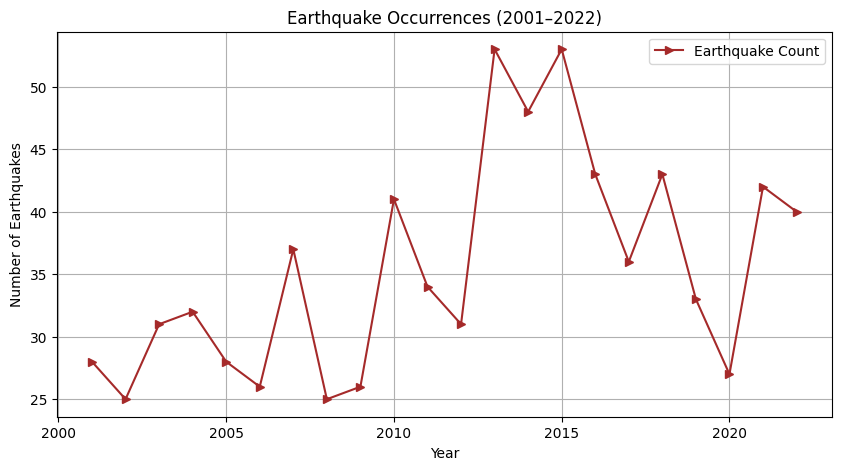

In [19]:
# --- Plot 1: Earthquake & Tsunami counts per year ---
plt.figure(figsize=(10,5))
plt.plot(yearly_quakes, marker='>', label='Earthquake Count',color = 'brown')
plt.title('Earthquake Occurrences (2001–2022)')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.legend()
plt.grid(True)
plt.show()

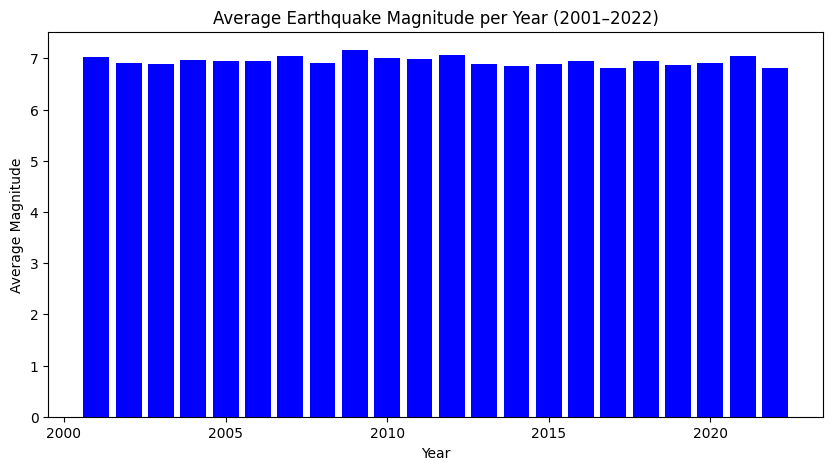

In [29]:
# Average Earthquake Magnitude 
plt.figure(figsize=(10,5))
plt.bar(avg_magnitude.index, avg_magnitude.values, color='Blue')
plt.title('Average Earthquake Magnitude per Year (2001–2022)')
plt.xlabel('Year')
plt.ylabel('Average Magnitude')
plt.show()

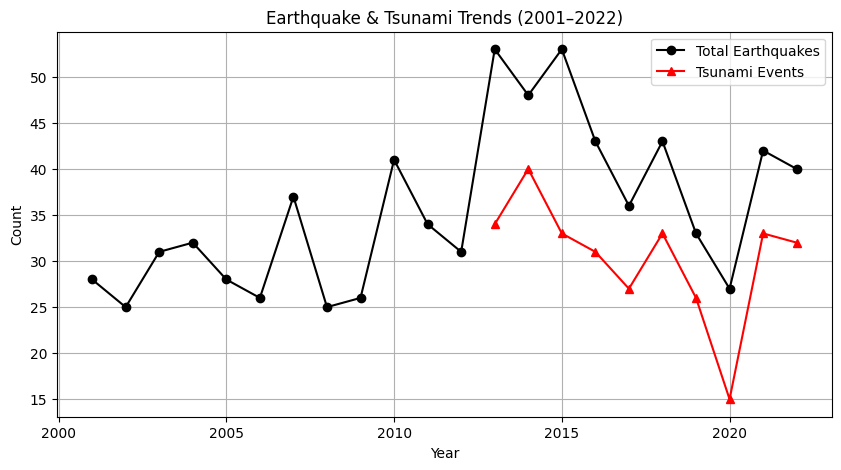

In [25]:
# Earthquake vs Tsunami Frequency 
plt.figure(figsize=(10,5))
plt.plot(yearly_quakes.index, yearly_quakes.values, color='black', label='Total Earthquakes', marker='o')
plt.plot(tsunami_events.index, tsunami_events.values, color='red', label='Tsunami Events', marker='^')
plt.title('Earthquake & Tsunami Trends (2001–2022)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

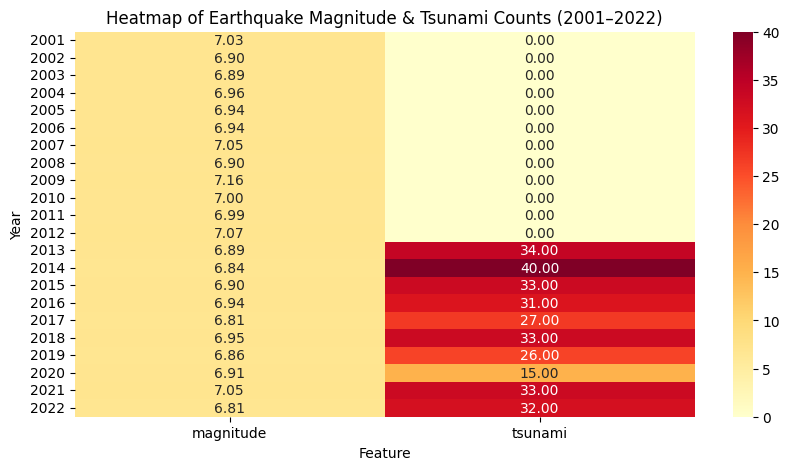

In [30]:
# Heatmap for Earthquake & Tsunami Overview ---
heat_data = data.groupby('Year').agg({'magnitude':'mean', 'tsunami':'sum'}).reset_index()
plt.figure(figsize=(10,5))
sns.heatmap(
    heat_data.set_index('Year')[['magnitude', 'tsunami']],
    annot=True, fmt='.2f', cmap='YlOrRd', cbar=True
)
plt.title('Heatmap of Earthquake Magnitude & Tsunami Counts (2001–2022)')
plt.xlabel('Feature')
plt.ylabel('Year')
plt.show()

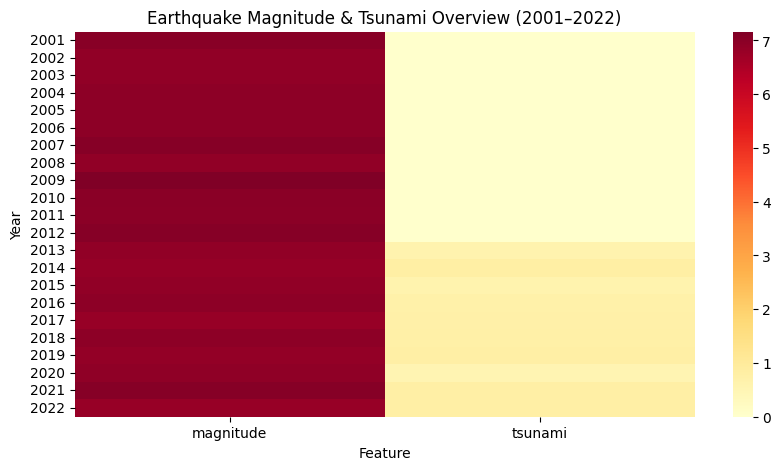

In [32]:
# Group data by year and get average magnitude & tsunami count
heat_data = data.groupby('Year')[['magnitude', 'tsunami']].mean()

# Create heatmap
plt.figure(figsize=(10,5))
sns.heatmap(heat_data, cmap='YlOrRd')
plt.title('Earthquake Magnitude & Tsunami Overview (2001–2022)')
plt.xlabel('Feature')
plt.ylabel('Year')
plt.show()


#  Magnitude and Depth Analysis:
1. Analyze the distribution of earthquake magnitudes and depths.
2. Compare the average magnitude and depth of tsunami vs. non-tsunami events.
3. Highlight major earthquakes (≥8.0) and their characteristics

# Distribution of Earthquake Magnitudes and Depths

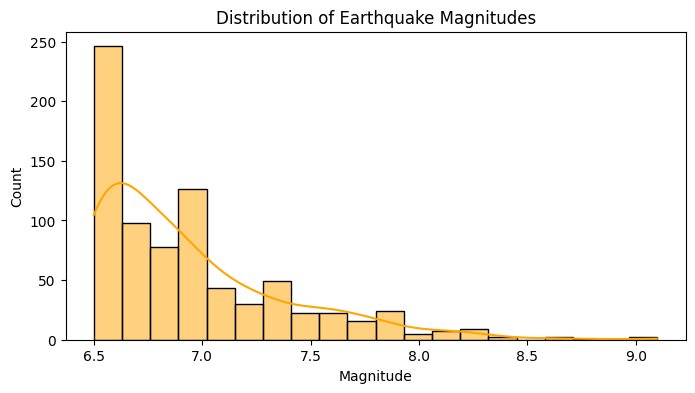

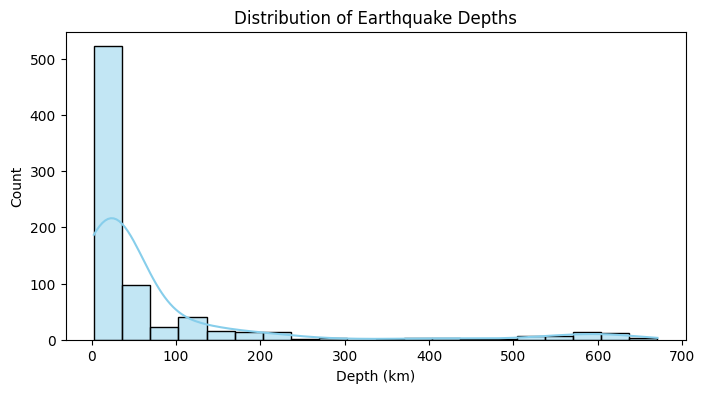

In [33]:
# Histogram for Magnitude
plt.figure(figsize=(8,4))
sns.histplot(data['magnitude'], bins=20, color='orange', kde=True)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.show()

# Histogram for Depth
plt.figure(figsize=(8,4))
sns.histplot(data['depth'], bins=20, color='skyblue', kde=True)
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Count')
plt.show()


         magnitude      depth
tsunami                      
0         6.942803  69.667356
1         6.938487  85.656796


C:\Users\Admin\AppData\Local\Temp\ipykernel_8184\2883000981.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tsunami', y='magnitude', data=data, palette='Set2')


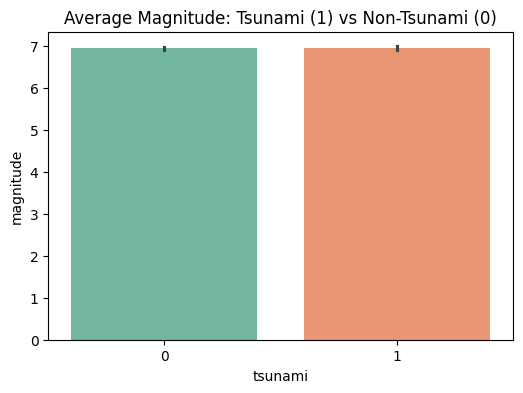

C:\Users\Admin\AppData\Local\Temp\ipykernel_8184\2883000981.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tsunami', y='depth', data=data, palette='Set1')


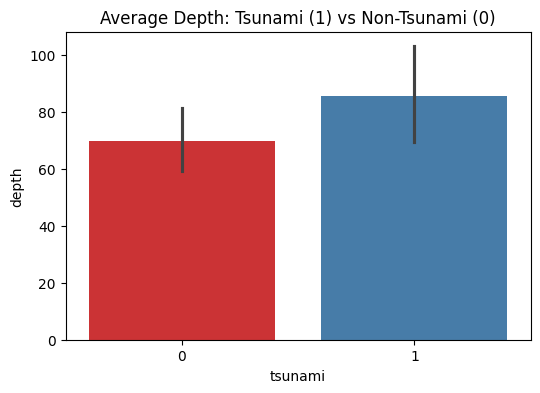

In [34]:
# Compare Tsunami vs Non-Tsunami Events
# Average magnitude and depth for tsunami vs non-tsunami
comparison = data.groupby('tsunami')[['magnitude', 'depth']].mean()
print(comparison)

# Visual comparison
plt.figure(figsize=(6,4))
sns.barplot(x='tsunami', y='magnitude', data=data, palette='Set2')
plt.title('Average Magnitude: Tsunami (1) vs Non-Tsunami (0)')
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='tsunami', y='depth', data=data, palette='Set1')
plt.title('Average Depth: Tsunami (1) vs Non-Tsunami (0)')
plt.show()


In [36]:
# Highlight Major Earthquakes (≥ 8.0 Magnitude)
# Filter major earthquakes
major_eq = data[data['magnitude'] >= 8.0]

# Show key details
print(major_eq[['Year', 'magnitude', 'depth', 'tsunami']])



     Year  magnitude   depth  tsunami
56   2021       8.10   22.79        0
59   2021       8.20   46.66        1
60   2021       8.20   35.00        1
74   2021       8.10   28.93        1
129  2019       8.00  122.57        1
170  2018       8.20  600.00        1
198  2017       8.20   47.39        1
285  2015       8.30   22.44        1
356  2014       8.20   25.00        1
393  2013       8.30  598.10        1
414  2013       8.00   24.00        1
440  2012       8.20   25.10        0
441  2012       8.60   20.00        0
476  2011       9.10   29.00        0
517  2010       8.80   22.90        0
535  2009       8.10   18.00        0
593  2007       8.40   34.00        0
597  2007       8.00   39.00        0
606  2007       8.10   24.00        0
611  2007       8.10   10.00        0
614  2006       8.30   10.00        0
627  2006       8.00   55.00        0
628  2006       8.00   60.50        0
657  2005       8.60   30.00        0
668  2004       9.10   30.00        0
669  2004   

# Geographic Distribution Using 2D Plotting:
1. Plot earthquake locations using latitude and longitude on a 2D scatter plot.
2. Visually distinguish between tsunami and non-tsunami events.
3. Identify clusters or regions with higher concentration of tsunami events (without using map
tiles or interactive maps).


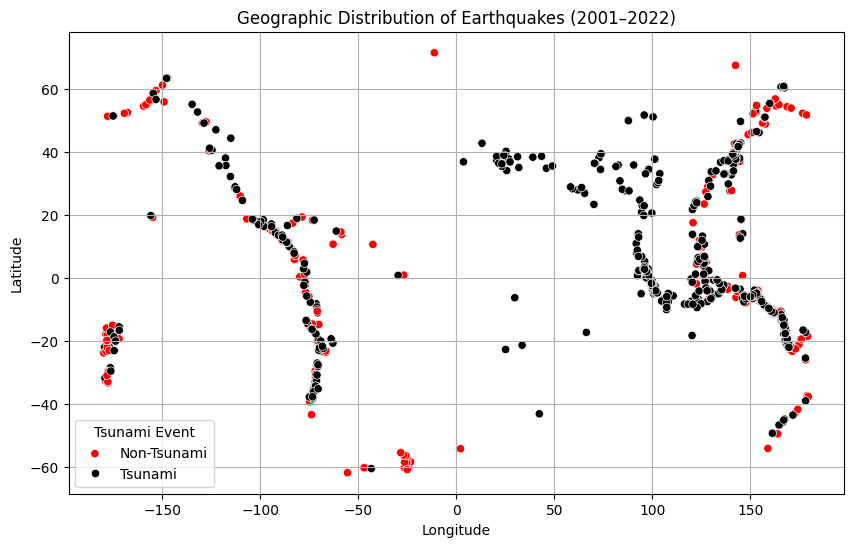

In [37]:
# Plot earthquake locations using latitude and longitude on a 2D scatter plot.
# Scatter plot: latitude vs longitude
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude',y='latitude',hue='tsunami',data = data,palette={0: 'black', 1: 'red'})# color by tsunami (0 = no, 1 = yes)
plt.title('Geographic Distribution of Earthquakes (2001–2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Tsunami Event', labels=['Non-Tsunami', 'Tsunami'])
plt.grid(True)
plt.show()


<Axes: xlabel='longitude', ylabel='latitude'>

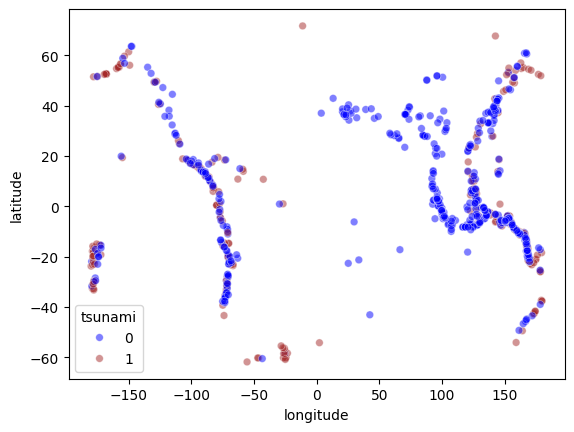

In [38]:
# Highlight tsunami clusters more clearly
sns.scatterplot(x='longitude', y='latitude',hue='tsunami', data=data,palette={0: 'blue', 1: 'Brown'},alpha=0.5, s=30)


# Statistical and Comparative Analysis:
1. Use box plots, histograms, and bar charts to compare seismic features between tsunami
and non-tsunami events.
2. Analyze correlations between variables using heatmaps.

C:\Users\Admin\AppData\Local\Temp\ipykernel_8184\4137683588.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tsunami', y='magnitude', data=data, palette='Set2')


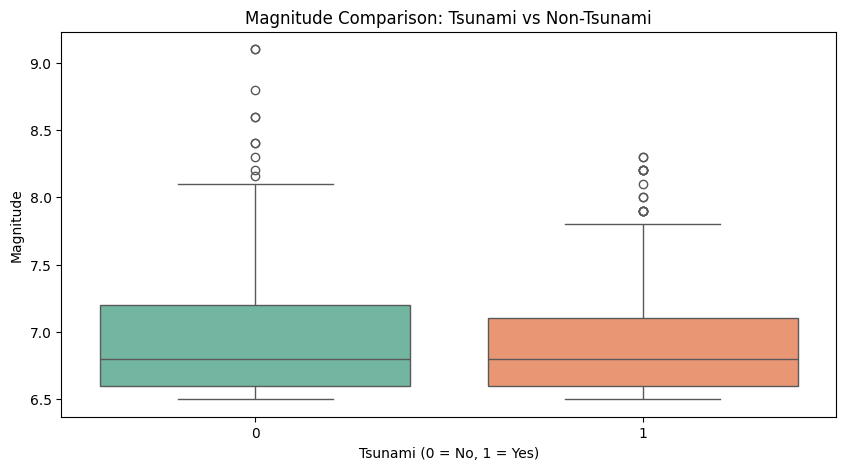

C:\Users\Admin\AppData\Local\Temp\ipykernel_8184\4137683588.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tsunami', y='depth', data=data, palette='Set3')


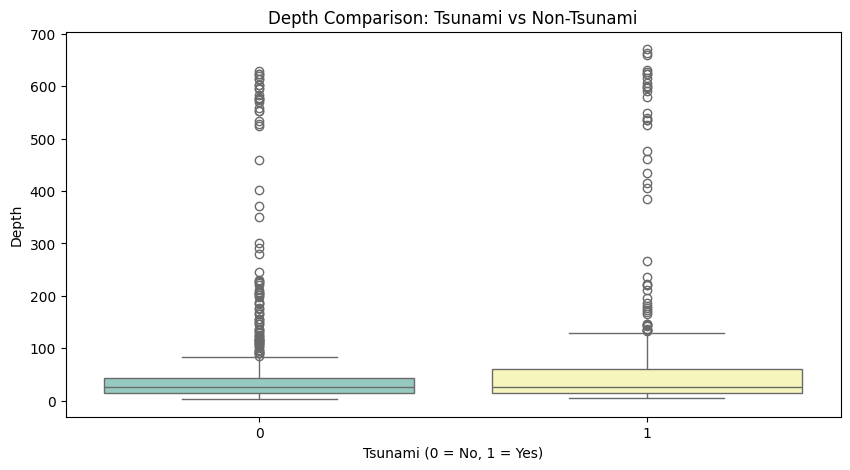

In [40]:
# Use box plots, histograms, and bar charts to compare seismic features between tsunami and non-tsunami events.
# Compare Tsunami vs Non-Tsunami
plt.figure(figsize=(10,5))
sns.boxplot(x='tsunami', y='magnitude', data=data, palette='Set2')
plt.title('Magnitude Comparison: Tsunami vs Non-Tsunami')
plt.xlabel('Tsunami (0 = No, 1 = Yes)')
plt.ylabel('Magnitude')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='tsunami', y='depth', data=data, palette='Set3')
plt.title('Depth Comparison: Tsunami vs Non-Tsunami')
plt.xlabel('Tsunami (0 = No, 1 = Yes)')
plt.ylabel('Depth')
plt.show()


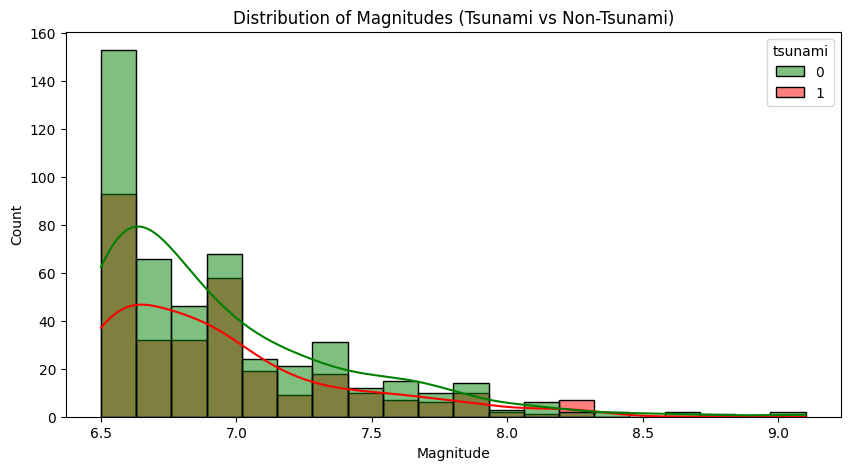

In [42]:
# Compare Magnitude Distributions
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='magnitude', hue='tsunami', bins=20, kde=True, palette={0:'green', 1:'red'})
plt.title('Distribution of Magnitudes (Tsunami vs Non-Tsunami)')
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.show()

<Figure size 800x500 with 0 Axes>

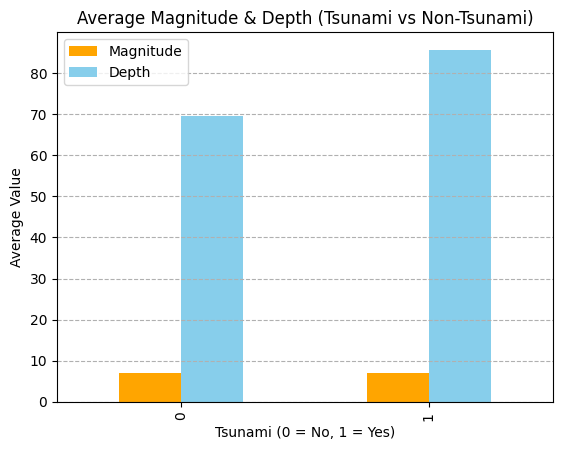

In [43]:
# Average Values by Tsunami Type
avg_values = data.groupby('tsunami')[['magnitude', 'depth']].mean().reset_index()

plt.figure(figsize=(8,5))
avg_values.plot(x='tsunami', kind='bar', color=['orange', 'skyblue'])
plt.title('Average Magnitude & Depth (Tsunami vs Non-Tsunami)')
plt.xlabel('Tsunami (0 = No, 1 = Yes)')
plt.ylabel('Average Value')
plt.legend(['Magnitude', 'Depth'])
plt.grid(axis='y', linestyle='--')
plt.show()


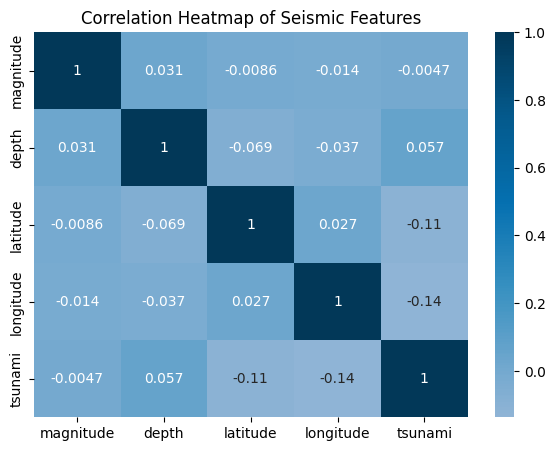

In [45]:
# Relationship Between Variables
# Select numeric columns
corr = data[['magnitude', 'depth', 'latitude', 'longitude', 'tsunami']].corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='PuBu', center=0)
plt.title('Correlation Heatmap of Seismic Features')
plt.show()


<b>Insights and Observations:</b>
1. Summarize key differences in seismic behavior between tsunami and non-tsunami
earthquakes.
2. Identify seismic thresholds or indicators associated with increased tsunami potential.

In [52]:
# Compare average magnitude and depth
summary = data.groupby('tsunami')[['magnitude', 'depth']].mean().reset_index()

# Rename for clarity
summary['Event_Type'] = summary['tsunami'].map({0: 'Non-Tsunami', 1: 'Tsunami'})

print("Average Magnitude and Depth Comparison:\n")
print(summary[['Event_Type', 'magnitude', 'depth']])
print("\nObservations:")
print("- Tsunami earthquakes generally have higher magnitudes and shallower depths.")
print("- Non-tsunami earthquakes are usually deeper and of lower magnitude.")
print("- Shallow, high-magnitude quakes near oceans are more likely to generate tsunamis.")


Average Magnitude and Depth Comparison:

    Event_Type  magnitude      depth
0  Non-Tsunami   6.942803  69.667356
1      Tsunami   6.938487  85.656796

Observations:
- Tsunami earthquakes generally have higher magnitudes and shallower depths.
- Non-tsunami earthquakes are usually deeper and of lower magnitude.
- Shallow, high-magnitude quakes near oceans are more likely to generate tsunamis.


In [51]:
# Check average magnitude and depth for tsunami vs non-tsunami
summary = data.groupby('tsunami')[['magnitude', 'depth']].mean().reset_index()
print("Average Magnitude and Depth for Tsunami vs Non-Tsunami Events:")
print(summary)
print("\n")

# Find possible thresholds
mag_threshold = data[data['tsunami'] == 1]['magnitude'].min()
depth_threshold = data[data['tsunami'] == 1]['depth'].max()

print(f"Possible magnitude threshold for tsunami generation: ≥ {mag_threshold:.1f}")
print(f"Possible depth threshold for tsunami generation: ≤ {depth_threshold:.1f} km")

# Observation
print("\nObservations:")
print("- Tsunami events mostly occur when magnitude is high and depth is shallow.")
print("- Higher magnitudes (≥7.0) and shallow depths (≤50 km) increase tsunami potential.")


Average Magnitude and Depth for Tsunami vs Non-Tsunami Events:
   tsunami  magnitude      depth
0        0   6.942803  69.667356
1        1   6.938487  85.656796


Possible magnitude threshold for tsunami generation: ≥ 6.5
Possible depth threshold for tsunami generation: ≤ 670.8 km

Observations:
- Tsunami events mostly occur when magnitude is high and depth is shallow.
- Higher magnitudes (≥7.0) and shallow depths (≤50 km) increase tsunami potential.


# Summary Report (optional):
1. Key findings from the analysis
2. Visual summaries of tsunami risk factors
3. Interpretation of patterns in earthquake characteristics

Tsunami-generating earthquakes are typically strong, shallow, and oceanic, while non-tsunami earthquakes are deeper and less energetic.
Understanding these seismic thresholds is crucial for improving tsunami prediction and coastal safety planning.